In [0]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
(X_Train,_),(_,_) = mnist.load_data()

In [49]:
print(X_Train.shape)

(60000, 28, 28)


In [50]:
# Normalize this data [-1,1] 
X_Train  = (X_Train.astype('float32') - 127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))

print(X_Train.shape)

-1.0
1.0
(60000, 28, 28)


In [0]:
X_Train = X_Train.reshape((*X_Train.shape , 1))

In [52]:
X_Train.shape

(60000, 28, 28, 1)

In [0]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE) 
HALF_BATCH = 128
NOISE_DIM = 100 # Upsample into 784 Dim Vector
adam = Adam(lr=2e-4,beta_1=0.5)

In [54]:
# Generator 
# Input Noise (100 dim) and Outputs a Vector (784 dim)

generator = Sequential()
generator.add(Dense(7*7*128 , input_shape = (NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())


generator.add(Conv2DTranspose(64 , kernel_size=(5,5) , strides=(2,2) , padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())


generator.add(Conv2DTranspose(1 , kernel_size=(5,5) , strides=(2,2) , padding='same' , activation='tanh'))

generator.compile(optimizer=adam , loss = 'binary_crossentropy')
generator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6272)              633472    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
__________

In [55]:
discriminator = Sequential()
discriminator.add(Conv2D(64 , (5,5) , strides=(2,2) , padding='same' , input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Conv2D(128 , (5,5) , strides=(2,2) , padding='same'))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Flatten())
discriminator.add(Dense(1 , activation='sigmoid'))

discriminator.compile(loss = 'binary_crossentropy' , optimizer=adam)
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
# GAN (Step-2)
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [11]:
X_Train = X_Train.reshape(-1,784)
print(X_Train.shape)

(60000, 784)


In [0]:
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('tranimage/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc Loss 0.6917 Generator Loss 0.8346
Epoch 2 Disc Loss 0.6917 Generator Loss 0.8279
Epoch 3 Disc Loss 0.6916 Generator Loss 0.8237
Epoch 4 Disc Loss 0.6910 Generator Loss 0.8202
Epoch 5 Disc Loss 0.6901 Generator Loss 0.8183
Epoch 6 Disc Loss 0.6894 Generator Loss 0.8238
Epoch 7 Disc Loss 0.6891 Generator Loss 0.8197
Epoch 8 Disc Loss 0.6887 Generator Loss 0.8202
Epoch 9 Disc Loss 0.6882 Generator Loss 0.8195
Epoch 10 Disc Loss 0.6876 Generator Loss 0.8267


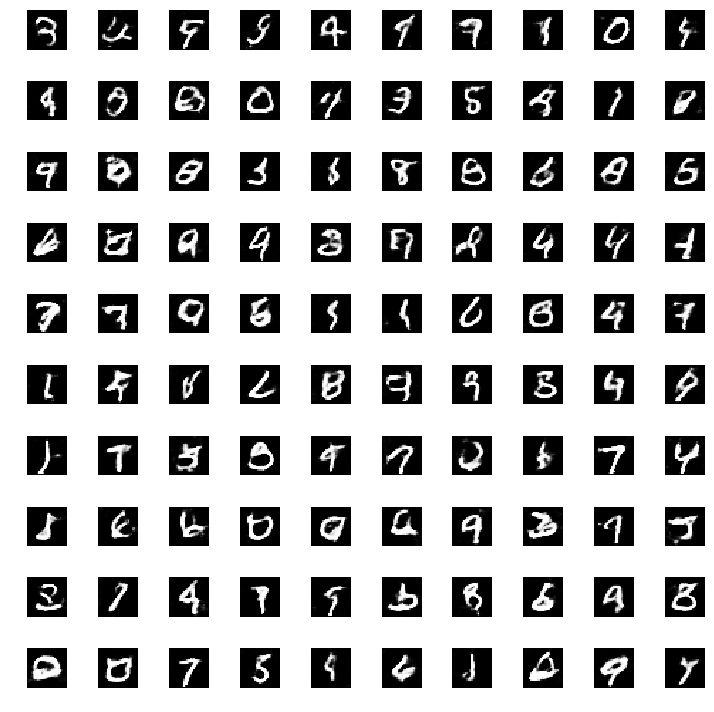

Epoch 11 Disc Loss 0.6876 Generator Loss 0.8224
Epoch 12 Disc Loss 0.6870 Generator Loss 0.8218
Epoch 13 Disc Loss 0.6867 Generator Loss 0.8255
Epoch 14 Disc Loss 0.6860 Generator Loss 0.8284
Epoch 15 Disc Loss 0.6856 Generator Loss 0.8294
Epoch 16 Disc Loss 0.6853 Generator Loss 0.8284
Epoch 17 Disc Loss 0.6851 Generator Loss 0.8279
Epoch 18 Disc Loss 0.6840 Generator Loss 0.8324
Epoch 19 Disc Loss 0.6841 Generator Loss 0.8295
Epoch 20 Disc Loss 0.6830 Generator Loss 0.8427


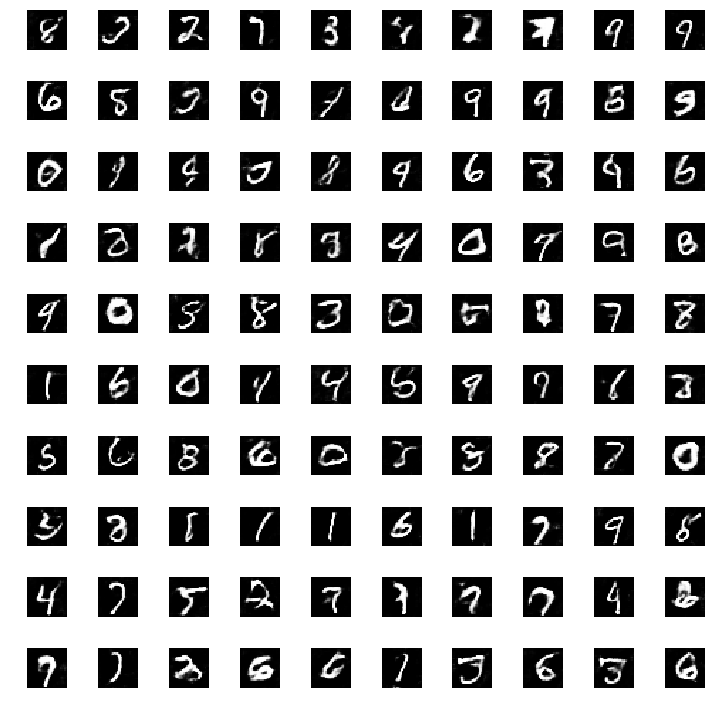

Epoch 21 Disc Loss 0.6823 Generator Loss 0.8424
Epoch 22 Disc Loss 0.6821 Generator Loss 0.8356
Epoch 23 Disc Loss 0.6817 Generator Loss 0.8367
Epoch 24 Disc Loss 0.6805 Generator Loss 0.8475
Epoch 25 Disc Loss 0.6801 Generator Loss 0.8427
Epoch 26 Disc Loss 0.6795 Generator Loss 0.8472
Epoch 27 Disc Loss 0.6788 Generator Loss 0.8498
Epoch 28 Disc Loss 0.6782 Generator Loss 0.8526
Epoch 29 Disc Loss 0.6772 Generator Loss 0.8638
Epoch 30 Disc Loss 0.6763 Generator Loss 0.8629


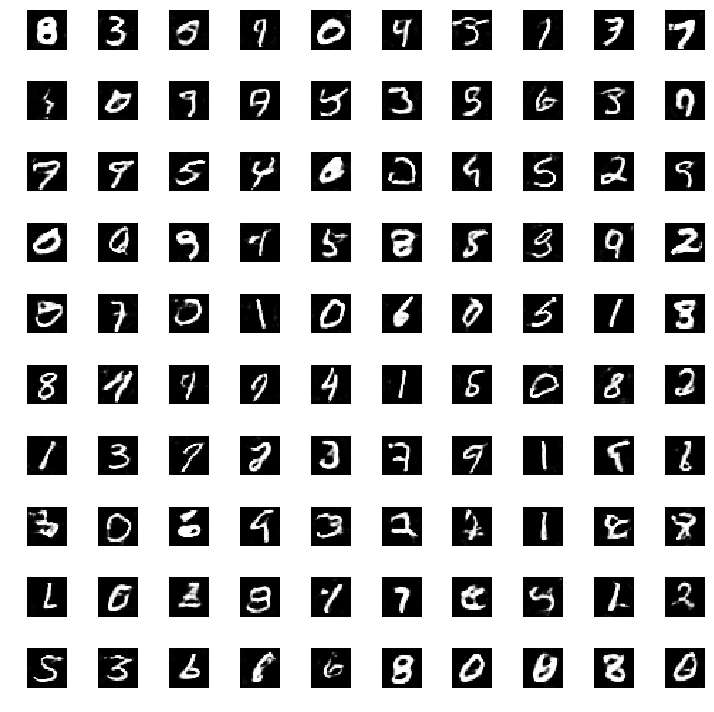

Epoch 31 Disc Loss 0.6757 Generator Loss 0.8640
Epoch 32 Disc Loss 0.6746 Generator Loss 0.8661
Epoch 33 Disc Loss 0.6733 Generator Loss 0.8751
Epoch 34 Disc Loss 0.6725 Generator Loss 0.8756
Epoch 35 Disc Loss 0.6717 Generator Loss 0.8793
Epoch 36 Disc Loss 0.6701 Generator Loss 0.8859
Epoch 37 Disc Loss 0.6693 Generator Loss 0.8856
Epoch 38 Disc Loss 0.6685 Generator Loss 0.8931
Epoch 39 Disc Loss 0.6671 Generator Loss 0.8962
Epoch 40 Disc Loss 0.6659 Generator Loss 0.9039


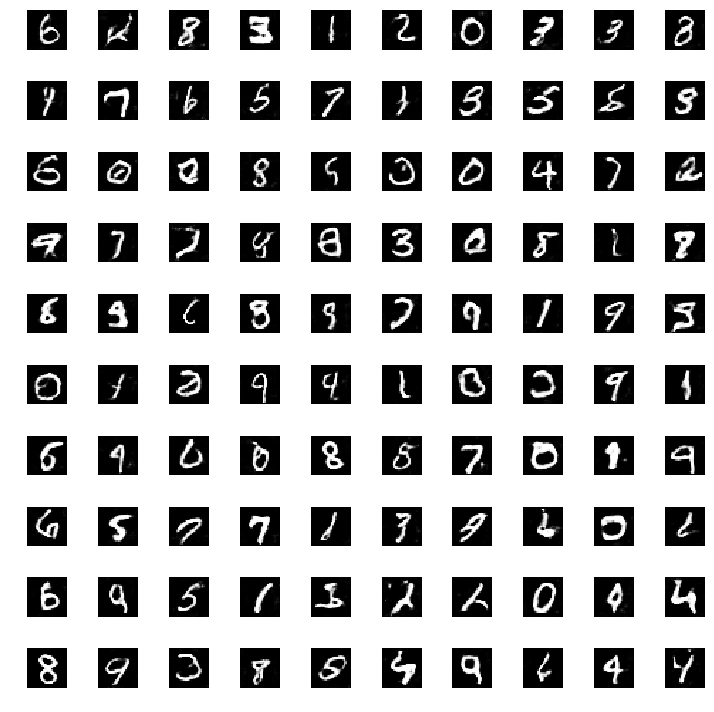

Epoch 41 Disc Loss 0.6645 Generator Loss 0.9083
Epoch 42 Disc Loss 0.6638 Generator Loss 0.9123
Epoch 43 Disc Loss 0.6622 Generator Loss 0.9169
Epoch 44 Disc Loss 0.6608 Generator Loss 0.9219
Epoch 45 Disc Loss 0.6597 Generator Loss 0.9282
Epoch 46 Disc Loss 0.6589 Generator Loss 0.9316
Epoch 47 Disc Loss 0.6577 Generator Loss 0.9363
Epoch 48 Disc Loss 0.6564 Generator Loss 0.9417
Epoch 49 Disc Loss 0.6549 Generator Loss 0.9488
Epoch 50 Disc Loss 0.6538 Generator Loss 0.9549


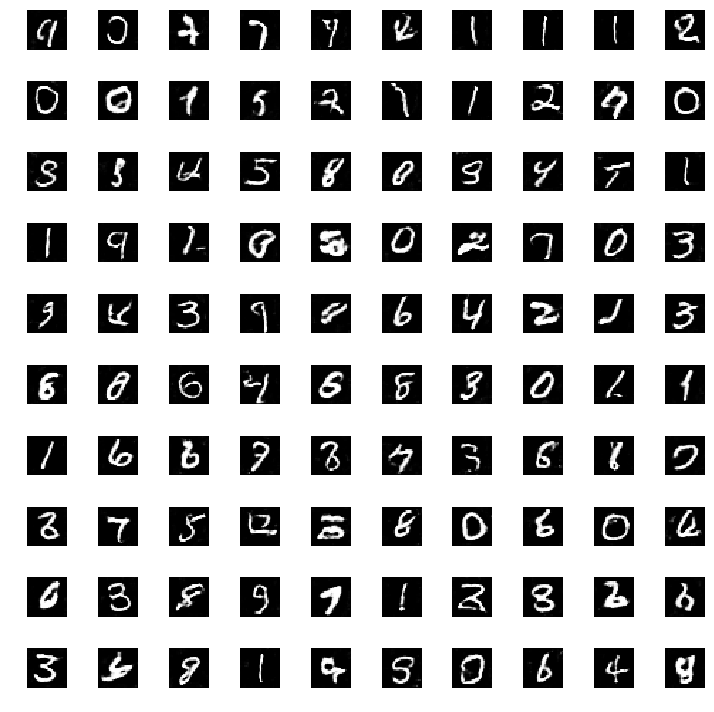

In [61]:
# Training Loop
d_losses = []
g_losses = []


for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    #Mini Batch SGD
    for step in range(NO_OF_BATCHES):
        
        # Step-1 Discriminator 
        # 50% Real Data + 50% Fake Data
        
        #Real Data X
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH)
        real_imgs = X_Train[idx]
        
        #Fake Data X
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise) #Forward 
        
        
        # Labels 
        real_y = np.ones((HALF_BATCH,1))*0.9 #One Side Label Smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Train our Discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        # Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (epoch+1)%10==0:
        generator.save('transpose/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)
        
        
        
        

In [67]:
!zip -r /content/transimage.zip /content/tranimage 

  adding: content/tranimage/ (stored 0%)
  adding: content/tranimage/gan_output_epoch_50.png (deflated 8%)
  adding: content/tranimage/gan_output_epoch_10.png (deflated 8%)
  adding: content/tranimage/gan_output_epoch_40.png (deflated 8%)
  adding: content/tranimage/gan_output_epoch_20.png (deflated 7%)
  adding: content/tranimage/gan_output_epoch_30.png (deflated 8%)


In [0]:
from google.colab import files
files.download("transimage.zip")

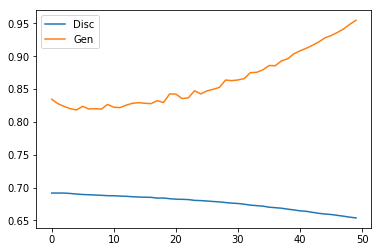

In [65]:
plt.plot(d_losses,label="Disc")
plt.plot(g_losses,label="Gen")
plt.legend()
plt.show()


In [0]:
!mkdir tranimage
!mkdir transpose